In [1]:
import os, sys, shutil
import torch
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib as plt
from PIL import Image
sys.path.append("../src")
from utils import *
from autoencoder import AutoEncoder
from gnet8_encoder import GNet8_Encoder
from matplotlib.lines import Line2D
import matplotlib as mpl
import math
import matplotlib.image as mpimg
import random
os.chdir("..")

/export/raid1/home/kneel027/miniconda3/envs/SS/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
GNet = GNet8_Encoder(device="cuda:2",subject=1)
_, _, x_test, _, _, images, _ = load_nsd(vector="images", subject=1, loader=False, average=True, nest=False, return_sessions=False)

loading samples: 100%|██████████| 27749/27749 [00:30<00:00, 917.99it/s]  


Data Shapes... x_train: torch.Size([21216, 15724]), x_val: torch.Size([3763, 15724]), x_test: torch.Size([982, 15724]), y_train: torch.Size([21216, 541875]), y_val: torch.Size([3763, 541875]), y_test: torch.Size([982, 541875])


In [3]:
beta_primes = GNet.predict(images)
torch.save(beta_primes, "/home/naxos2-raid25/kneel027/home/kneel027/MindEyeV2/subj1_beta_primes.pt")

ValueError: x and y must be the same size

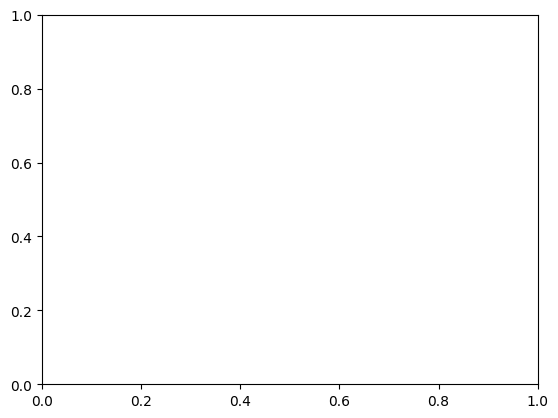

In [4]:
# print(beta_primes.mean(axis=1).shape, x_test.mean(axis=1).shape)
plt.scatter(x_test[10].flatten(), 3*beta_primes[10].flatten(), c="blue", alpha=0.5)
ax = plt.gca()
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
# Adding labels and title
plt.xlabel('Value of raw betas')
plt.ylabel('Value of encoded betas')
plt.title('Value comparison of betas vs beta primes - Subject 1')
plt.legend()
plt.grid(True)
plt.show()